In [169]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [264]:
hr_data = pd.read_csv('HR_Employee_Attrition_Data.csv')

hr_data['Non']

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [206]:
#contact_df = hr_data
#contact_df['Age'].unique()

#contact_df['Age_Interval'] =contact_df.apply(lambda x: '18-25' if x['Age']< 25  else(if x['Age'] , axis=1)


array([41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 29, 31, 34, 28, 22, 53,
       24, 21, 42, 44, 46, 39, 43, 50, 26, 48, 55, 45, 56, 23, 51, 40, 54,
       58, 20, 25, 19, 57, 52, 47, 18, 60], dtype=int64)

In [172]:
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    res_df['Age'] = le.fit_transform(res_df['Age'])
    res_df['Attrition'] = le.fit_transform(res_df['Attrition'])
    res_df['BusinessTravel'] = le.fit_transform(res_df['BusinessTravel'])
    res_df['Department'] = le.fit_transform(res_df['Department'])
    res_df['EducationField'] = le.fit_transform(res_df['EducationField'])
    res_df['Gender'] = le.fit_transform(res_df['Gender'])
    res_df['JobRole'] = le.fit_transform(res_df['JobRole'])
    res_df['MaritalStatus'] = le.fit_transform(res_df['MaritalStatus'])
    res_df['Over18'] = le.fit_transform(res_df['Over18'])
    res_df['OverTime'] = le.fit_transform(res_df['OverTime'])
    return res_df

In [185]:
encoded_df = preprocessor(contact_df)

x = encoded_df.drop(['Attrition'],axis =1).values
y = encoded_df['Attrition'].values

encoded_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,31,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,19,1,2,1373,1,2,2,4,1,3,...,2,80,0,7,3,3,0,0,0,0
3,15,0,1,1392,1,3,4,1,1,4,...,3,80,0,8,3,3,8,7,3,0
4,9,0,2,591,1,2,1,3,1,5,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,18,0,1,884,1,23,2,3,1,2936,...,3,80,1,17,3,3,5,2,0,3
2936,21,0,2,613,1,6,1,3,1,2937,...,1,80,1,9,5,3,7,7,1,7
2937,9,0,2,155,1,4,3,1,1,2938,...,2,80,1,6,0,3,6,2,0,3
2938,31,0,1,1023,2,2,3,3,1,2939,...,4,80,0,17,3,2,9,6,0,8


Index(['Attrition', 'OverTime', 'MaritalStatus', 'DistanceFromHome', 'JobRole',
       'Department', 'NumCompaniesWorked', 'Gender', 'EducationField',
       'MonthlyRate'],
      dtype='object')


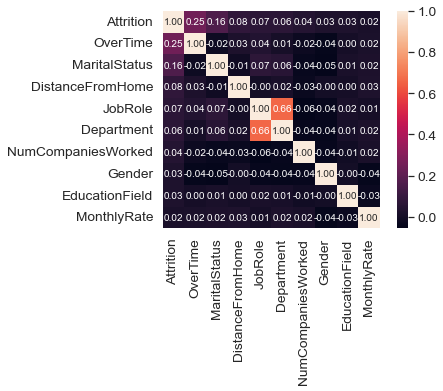

In [184]:
#attrition correlation matrix
from pyparsing import col

corrmat = encoded_df.corr()
#print (corrmat)

k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Attrition')['Attrition'].index
print(cols)
cm = np.corrcoef(encoded_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [190]:
#encoded_df.drop(['Department','EmployeeNumber'],axis=1,inplace=True)
encoded_df

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,1102,1,2,1,1,2,0,...,1,80,0,8,0,1,6,4,0,5
1,31,0,1,279,8,1,1,1,3,1,...,4,80,1,10,3,3,10,7,1,7
2,19,1,2,1373,2,2,4,1,4,1,...,2,80,0,7,3,3,0,0,0,0
3,15,0,1,1392,3,4,1,1,4,0,...,3,80,0,8,3,3,8,7,3,0
4,9,0,2,591,2,1,3,1,1,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,18,0,1,884,23,2,3,1,3,1,...,3,80,1,17,3,3,5,2,0,3
2936,21,0,2,613,6,1,3,1,4,1,...,1,80,1,9,5,3,7,7,1,7
2937,9,0,2,155,4,3,1,1,2,1,...,2,80,1,6,0,3,6,2,0,3
2938,31,0,1,1023,2,3,3,1,4,1,...,4,80,0,17,3,2,9,6,0,8


In [191]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2)

In [192]:
# with depth = 2
model_dt_2 = DecisionTreeClassifier(random_state=1, max_depth=2)
model_dt_2.fit(x_train, y_train)
model_dt_2_score_train = model_dt_2.score(x_train, y_train)
print("Training score: ",model_dt_2_score_train)
model_dt_2_score_test = model_dt_2.score(x_test, y_test)
print("Testing score: ",model_dt_2_score_test)

Training score:  0.8443877551020408
Testing score:  0.8435374149659864


In [193]:
# Decision tree with depth = 4
model_dt_4 = DecisionTreeClassifier(random_state=1, max_depth=4)
model_dt_4.fit(x_train, y_train)
model_dt_4_score_train = model_dt_4.score(x_train, y_train)
print("Training score: ",model_dt_4_score_train)
model_dt_4_score_test = model_dt_4.score(x_test, y_test)
print("Testing score: ",model_dt_4_score_test)

Training score:  0.8643707482993197
Testing score:  0.8486394557823129


In [204]:
# Decision tree with depth = 6
model_dt_6 = DecisionTreeClassifier(random_state=1, max_depth=6)
model_dt_6.fit(x_train, y_train)
model_dt_6_score_train = model_dt_6.score(x_train, y_train)
print("Training score: ",model_dt_6_score_train)
model_dt_6_score_test = model_dt_6.score(x_test, y_test)
print("Testing score: ",model_dt_6_score_test)

Training score:  0.9043367346938775
Testing score:  0.8826530612244898


In [195]:
# Decision tree with depth = 8
model_dt_8 = DecisionTreeClassifier(random_state=1, max_depth=8, criterion = "gini")
model_dt_8.fit(x_train, y_train)
model_dt_8_score_train = model_dt_8.score(x_train, y_train)
print("Training score: ",model_dt_8_score_train)
model_dt_8_score_test = model_dt_8.score(x_test, y_test)
print("Testing score: ",model_dt_8_score_test)
predict = 

Training score:  0.9472789115646258
Testing score:  0.9183673469387755


In [242]:
model_dt_8_ = DecisionTreeClassifier(random_state=1, max_depth=8, criterion = "gini",min_samples_leaf=10,min_samples_split=100)
model_dt_8_.fit(x_train, y_train)
model_dt_8_score_train_ = model_dt_8_.score(x_train, y_train)
print("Training score: ",model_dt_8_score_train_)
model_dt_8_score_test_ = model_dt_8_.score(x_test, y_test)
print("Testing score: ",model_dt_8_score_test_)

Training score:  0.8809523809523809
Testing score:  0.8435374149659864


In [243]:
model_dt_8_en = DecisionTreeClassifier(random_state=1, max_depth=8, criterion = "entropy",min_samples_leaf=10,min_samples_split=100)
model_dt_8_en.fit(x_train, y_train)
model_dt_8_escore_train = model_dt_8_en.score(x_train, y_train)
print("Training score: ",model_dt_8_score_train)
model_dt_8_escore_test = model_dt_8_en.score(x_test, y_test)
print("Testing score: ",model_dt_8_escore_test)



Training score:  0.8809523809523809
Testing score:  0.8673469387755102


In [244]:
# performance analysis with depth = 8

y_pred_dt = model_dt_8.predict_proba(x_test)[:, 1]

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)
roc_auc_dt

0.8168401356566483

In [255]:
predictions = model_dt_8.predict(x_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,

In [256]:
confu_mat = confusion_matrix(y_test, predictions)
confu_mat

array([[479,  24],
       [ 54,  31]], dtype=int64)

In [257]:
accuracy_score(y_test, predictions)

0.8673469387755102

In [251]:
# performance analysis with depth = 8 (parameteres)
pred_dt=model_dt_8_.predict(x_test)

fpr_dt, tpr_dt, _ = roc_curve(y_test, pred_dt)
roc_auc_ = auc(fpr_dt, tpr_dt)
roc_auc_


0.63480294702374

In [252]:
# performance analysis with depth = 6 (parameteres)
pred_dt_6=model_dt_6.predict_proba(x_test)[:, 1]

fpr_dt_6, tpr_dt_6, _ = roc_curve(y_test, pred_dt_6)
roc_auc_6 = auc(fpr_dt_6, tpr_dt_6)
roc_auc_6


0.7812068763887265

In [262]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["Success", "Default"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

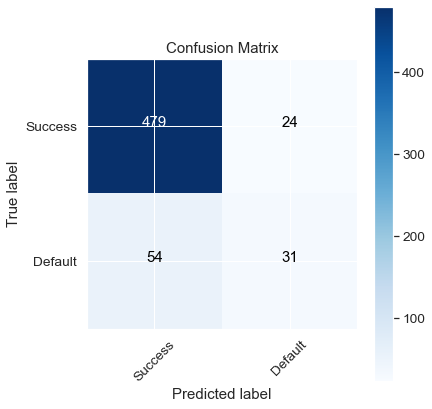

In [263]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(predictions, normalize=False)
plt.show()      